In [3]:
import numpy as np

import pandas as pd
import seaborn as sb

from keras.models import Sequential # Class
from keras.layers import Dense # Class

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [4]:
# 훈련용, 검증용
df = pd.read_csv('./sonar.csv', header=None)
# print(df.info())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
data = df.values
print(type(data))
print(len(data))  # 208건
X = data[:, 0:60].astype(float)  # 0 ~ 59
print(X[0:5, 0:4])
Y_obj = data[:, 60]  # 1차원 배열
print(Y_obj[0:5])

<class 'numpy.ndarray'>
208
[[0.02   0.0371 0.0428 0.0207]
 [0.0453 0.0523 0.0843 0.0689]
 [0.0262 0.0582 0.1099 0.1083]
 [0.01   0.0171 0.0623 0.0205]
 [0.0762 0.0666 0.0481 0.0394]]
['R' 'R' 'R' 'R' 'R']


In [22]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder() # 문자열을 숫자로 그룹화해서 변경, 문자코드 순서 적용
e.fit(Y_obj)   # R, M 
Y = e.transform(Y_obj)  # 0, 1, 2 정수로 변환 (알파벳 순으로 숫자부여)
print(Y)
print(len(Y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
208


In [13]:
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원

seed = 0
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,random_state=seed)
print(y_val)
print(y_val.shape)

[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1]
(42,)


In [15]:
from keras.callbacks import EarlyStopping
from keras import regularizers

# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear
model.add(Dense(60, input_shape=(60,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=120, batch_size=5, callbacks=[early_stopping])

Train on 166 samples, validate on 42 samples
Epoch 1/120
166/166 [==============================] - 0s 1ms/step - loss: 0.7110 - acc: 0.5361 - val_loss: 0.6786 - val_acc: 0.6190
Epoch 2/120
166/166 [==============================] - 0s 265us/step - loss: 0.6697 - acc: 0.5542 - val_loss: 0.6602 - val_acc: 0.6190
Epoch 3/120
166/166 [==============================] - 0s 271us/step - loss: 0.6429 - acc: 0.6687 - val_loss: 0.6451 - val_acc: 0.5952
Epoch 4/120
166/166 [==============================] - 0s 271us/step - loss: 0.6109 - acc: 0.6988 - val_loss: 0.6216 - val_acc: 0.6667
Epoch 5/120
166/166 [==============================] - 0s 259us/step - loss: 0.5898 - acc: 0.7108 - val_loss: 0.6083 - val_acc: 0.6667
Epoch 6/120
166/166 [==============================] - 0s 271us/step - loss: 0.5698 - acc: 0.7771 - val_loss: 0.5936 - val_acc: 0.6667
Epoch 7/120
166/166 [==============================] - 0s 271us/step - loss: 0.5618 - acc: 0.7169 - val_loss: 0.5712 - val_acc: 0.7143
Epoch 8/120


Epoch 61/120
166/166 [==============================] - 0s 301us/step - loss: 0.2507 - acc: 0.9036 - val_loss: 0.3720 - val_acc: 0.9048
Epoch 62/120
166/166 [==============================] - 0s 295us/step - loss: 0.2441 - acc: 0.8976 - val_loss: 0.3979 - val_acc: 0.8571
Epoch 63/120
166/166 [==============================] - 0s 259us/step - loss: 0.2417 - acc: 0.9157 - val_loss: 0.3740 - val_acc: 0.9048
Epoch 64/120
166/166 [==============================] - 0s 313us/step - loss: 0.2403 - acc: 0.9036 - val_loss: 0.3680 - val_acc: 0.8810
Epoch 65/120
166/166 [==============================] - 0s 295us/step - loss: 0.2418 - acc: 0.9157 - val_loss: 0.3775 - val_acc: 0.8095
Epoch 66/120
166/166 [==============================] - 0s 277us/step - loss: 0.2343 - acc: 0.9096 - val_loss: 0.3919 - val_acc: 0.8571
Epoch 67/120
166/166 [==============================] - 0s 247us/step - loss: 0.2326 - acc: 0.9157 - val_loss: 0.3704 - val_acc: 0.8571
Epoch 68/120
166/166 [==========================

In [16]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


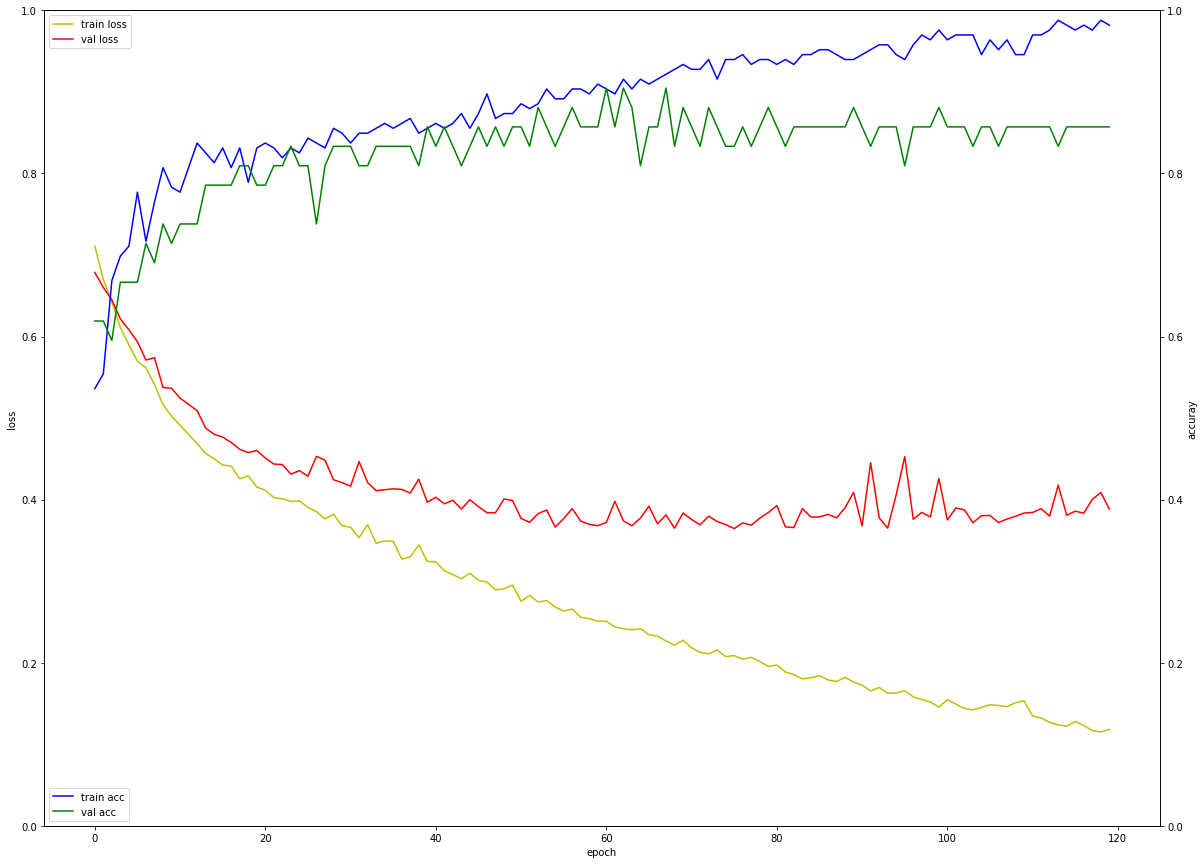

In [21]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test, batch_size=10)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

NameError: name 'x_test' is not defined

In [19]:
model.save('./Sonar1.h5')

In [20]:
from keras.models import load_model # model 사용

model = load_model('./Sonar1.h5')